<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/09_De_correlating_the_grain_measurements_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal Component Analysis (PCA)**

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. 

This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. 

PCA is sensitive to the relative scaling of the original variables. 

Here, we first check if the width and length of the seeds from the grain data are correlated. This is carried out by visualizing the data using a scatter plot and then pricipal component analysis is done to convert the values into linearly uncorrelated variables.

**The Seeds Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

All of these parameters were real-valued continuous.

This dataset was sourced from the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/seeds

In [0]:
# Download the seeds data using wget (Linux)
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt

--2020-01-03 16:31:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt’

seeds_dataset.txt   100%[===================>]   9.08K  --.-KB/s    in 0s      

2020-01-03 16:31:04 (114 MB/s) - ‘seeds_dataset.txt’ saved [9300/9300]



Import NumPy and Pandas

In [0]:
import numpy as np
import pandas as pd

Load the dataset to an array 'samples' containing the measurements (such as area, perimeter, length, and several others) of samples of grain.

In [0]:
samples = np.genfromtxt('seeds_dataset.txt')

In [0]:
# Test the dataload for the seeds dataset
samples

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

In [0]:
grains = samples[:,3:5]
grains

array([[5.763, 3.312],
       [5.554, 3.333],
       [5.291, 3.337],
       [5.324, 3.379],
       [5.658, 3.562],
       [5.386, 3.312],
       [5.563, 3.259],
       [5.42 , 3.302],
       [6.053, 3.465],
       [5.884, 3.505],
       [5.714, 3.242],
       [5.438, 3.201],
       [5.439, 3.199],
       [5.479, 3.156],
       [5.482, 3.114],
       [5.351, 3.333],
       [5.119, 3.383],
       [5.527, 3.514],
       [5.205, 3.466],
       [5.226, 3.049],
       [5.658, 3.129],
       [5.52 , 3.168],
       [5.618, 3.507],
       [5.099, 2.936],
       [5.789, 3.245],
       [5.833, 3.421],
       [5.395, 3.026],
       [5.395, 2.956],
       [5.541, 3.221],
       [5.516, 3.065],
       [5.454, 2.975],
       [5.757, 3.371],
       [5.717, 3.186],
       [5.585, 3.15 ],
       [5.712, 3.328],
       [5.709, 3.485],
       [5.826, 3.464],
       [5.832, 3.683],
       [5.656, 3.288],
       [5.397, 3.298],
       [5.348, 3.156],
       [5.351, 3.158],
       [5.138, 3.201],
       [5.8

In [0]:
labels = samples[:,-1]
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3.])

In [0]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr 

In [0]:
# Assign the 0th column of grains: width
width = grains[:,0]


In [0]:
# Assign the 1st column of grains: length
length = grains[:,1]

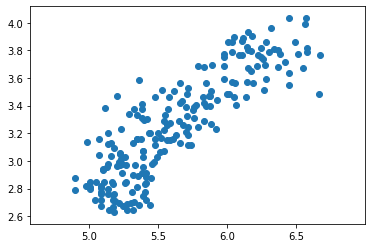

In [0]:
# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()


It can be observed in from above that the width and length measurements of the grain are correlated. 

Now, we will use Principal Component Analysis (PCA) to decorrelate these measurements, and then plot the decorrelated points and measure their Pearson correlation.

In [0]:
# Import PCA
from sklearn.decomposition import PCA

In [0]:
# Create PCA instance: model
model = PCA()

In [0]:
# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

In [0]:
# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

In [0]:
# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

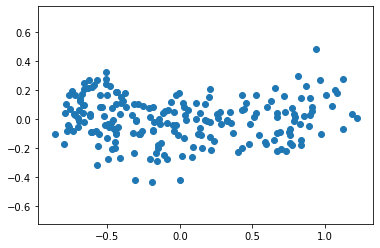

In [0]:
# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [0]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)
# Display the correlation
print(correlation)

-6.25584653524136e-17
